In [147]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.fftpack as sfft
import plotly.express as px

In [99]:
#px.scatter_3d(x = [1,1,2,2], y = [1,2,1,2], z = [1,1,1,1])

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=512x512 at 0x7FABB6DB6F98>


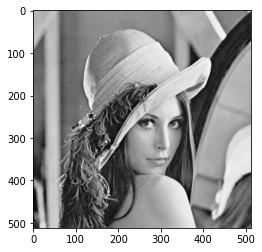

In [148]:
# Load image
lena = Image.open('lena.jpg')
print(lena)
plt.figure()
plt.imshow(lena, cmap = plt.get_cmap('Greys_r'))
x = np.array(lena)

In [149]:
def encode_quant(orig, quant):
    return (orig / quant).astype(np.int)

def decode_quant(orig, quant):
    return (orig * quant).astype(float)

def encode_dct(orig, bx, by):
    new_shape = (
        orig.shape[0] // bx * bx,
        orig.shape[1] // by * by
    )
    new = orig[
        :new_shape[0],
        :new_shape[1]
    ].reshape((
        new_shape[0] // bx,
        bx,
        new_shape[1] // by,
        by
    ))
    return sfft.dctn(new, axes=[1,3], norm='ortho')

def decode_dct(orig, bx, by):
    return sfft.idctn(orig, axes=[1,3], norm='ortho'
    ).reshape((
        orig.shape[0]*bx,
        orig.shape[2]*by
    ))

In [150]:
quants = [1,2,3,10] # q values
blocks = [(8,8)] # block size 8x8
decs = []

for qscale in quants:
    for bx,by in blocks:
        quant = (
                (np.ones((bx, by)) * (qscale * qscale))
                .clip(-100, 100)  # to prevent clipping
                .reshape((1, bx, 1, by))
            )
        
    enc = encode_dct(x,bx,by)
    encq = encode_quant(enc, quant)
    decq = decode_quant(encq, quant)
    dec = decode_dct(decq, bx, by)
    
    decs.append((dec,qscale))
        

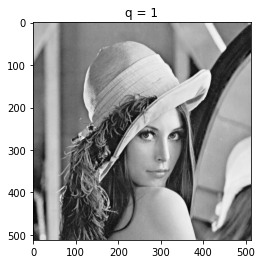

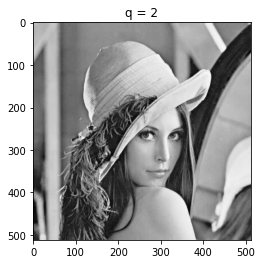

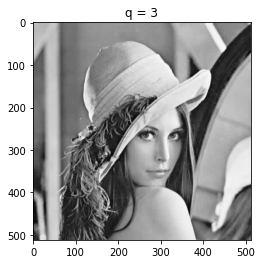

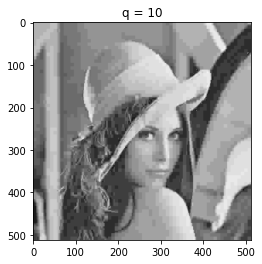

In [151]:
for i in decs:
    
    reconstructed = Image.fromarray(i[0].astype(np.uint8),'L')
    p = i[1]
    plt.figure()
    plt.title(f'q = {p}')
    plt.imshow(reconstructed, cmap = plt.get_cmap('Greys_r'))
    plt.show()